In [68]:
using CSV, DataFrames, MLBase, MLJBase
df = CSV.read("/users/maurizio/WiSARDpy/datasets/biomat.csv", DataFrames.DataFrame)
df = select(df, r"ACH-")
first(df, 5)

Row,ACH-000096,ACH-000159,ACH-000189,ACH-000234,ACH-000246,ACH-000250,ACH-000262,ACH-000272,ACH-000313,ACH-000317,ACH-000375,ACH-000385,ACH-000411,ACH-000433,ACH-000459,ACH-000484,ACH-000495,ACH-000600,ACH-000649,ACH-000684,ACH-000709,ACH-000792,ACH-000907,ACH-001163,ACH-001194,ACH-001310,ACH-001398,ACH-001532,ACH-001687,ACH-001688,ACH-002150,ACH-002189
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0299781,-0.0476409,-0.176746,0.311252,0.267278,-0.0260946,-0.0840901,0.0347586,-0.0827601,-0.0246658,0.330115,-0.138193,-0.000441293,0.130896,-0.079386,-0.240195,0.188227,0.0200409,0.0443688,0.154809,-0.429127,0.102024,-0.182083,-0.21606,0.0853519,0.292296,-0.181296,-0.0595327,0.0627526,-0.25074,-0.0221443,0.0846636
2,-0.0597323,-0.0491322,-0.0568622,-0.229753,-0.091176,-0.171976,-0.220484,-0.0631185,0.062306,-0.141407,-0.121086,-0.506503,0.0395196,-0.0174286,-0.149912,0.152519,-0.151166,-0.0844103,0.0242222,-0.261916,-0.00368036,-0.136236,-0.136191,0.162599,-0.0806921,-0.106339,-0.0760805,0.0188304,-0.106306,-0.0487259,0.0247122,-0.0793414
3,-1.70419,-1.39928,-1.16761,-1.62196,-0.742589,-0.78407,-1.34433,-0.620681,-0.957708,-1.21642,-1.85954,-1.83157,-1.14796,-1.33906,-0.731395,-0.657284,-1.18337,-0.73547,-0.898551,-1.34433,-0.670453,-1.24598,-1.28854,-0.836097,-1.11617,-1.16724,-0.77309,-1.65706,-1.29171,-1.35479,-0.937334,-0.850617
4,-0.162751,-0.0102262,0.231564,-0.133424,0.0771861,0.150375,0.162099,0.07958,0.0166894,-0.0469667,0.107988,0.0608473,0.0865903,-0.0714448,0.208974,0.0407524,-0.0643044,0.0138921,-0.0190468,0.157095,0.0733623,-0.030944,-0.145617,-0.00579023,0.0634245,-0.0111951,0.144476,0.156111,0.0195465,-0.214068,-0.0134098,0.0756541
5,0.111395,-0.00820374,0.247441,0.0793272,-0.000844839,-0.0273317,-0.0484397,0.0359097,-0.0284391,-0.0561422,0.119084,-0.0907331,-0.00496073,-0.275903,-0.0111741,-0.0785081,-0.0381608,-0.00805281,-0.0611063,0.0666436,0.0410345,-0.0784904,-0.122329,-0.00616589,-0.096392,0.0602429,0.0702246,-0.00621307,-0.141752,0.160387,0.0467372,-0.00581253


In [69]:
#foo(x) = x < -1.056 ? 0 : (x < -0.508 ? 1 : (x < -0.01 ? 2 : 3))
foo(x) = x < -1.056 ? "E" : (x < -0.508 ? "aE" : (x < -0.01 ? "aNE" : "NE"))
df = foo.(df[!, :])

Row,ACH-000096,ACH-000159,ACH-000189,ACH-000234,ACH-000246,ACH-000250,ACH-000262,ACH-000272,ACH-000313,ACH-000317,ACH-000375,ACH-000385,ACH-000411,ACH-000433,ACH-000459,ACH-000484,ACH-000495,ACH-000600,ACH-000649,ACH-000684,ACH-000709,ACH-000792,ACH-000907,ACH-001163,ACH-001194,ACH-001310,ACH-001398,ACH-001532,ACH-001687,ACH-001688,ACH-002150,ACH-002189
,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String,String
1,NE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,NE,NE,NE,aNE,NE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,aNE,NE
2,aNE,aNE,aNE,aNE,aNE,aNE,aNE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,aNE
3,E,E,E,E,aE,aE,E,aE,aE,E,E,E,E,E,aE,aE,E,aE,aE,E,aE,E,E,aE,E,E,aE,E,E,E,aE,aE
4,aNE,aNE,NE,aNE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,aNE,NE,NE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,NE,aNE,NE,NE,NE,aNE,aNE,NE
5,NE,NE,NE,NE,NE,aNE,aNE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,aNE,aNE,NE,aNE,NE,NE,aNE,aNE,NE,aNE,NE,NE,NE,aNE,NE,NE,NE
6,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE,NE,NE,NE,NE,NE,aNE,NE,NE
7,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E,E
8,aNE,NE,aNE,NE,NE,aNE,aNE,aNE,aNE,NE,NE,aNE,aNE,NE,aNE,NE,aNE,aNE,aNE,NE,aNE,aNE,NE,NE,aNE,aNE,aNE,aNE,NE,NE,NE,aNE
9,aNE,aNE,aE,aE,aE,aNE,aE,aE,aE,aNE,aNE,aNE,aE,aNE,aNE,aNE,aNE,aNE,aNE,aE,aE,aE,aNE,aNE,aNE,aE,aNE,aNE,aNE,aNE,aE,aE


In [97]:
using Plots
using DataStructures
df[!, :dist] = [Dict(counter(x)) for x in eachrow(Array(df))]

16751-element Vector{Dict{String, Int64}}:
 Dict("aNE" => 16, "NE" => 16)
 Dict("aNE" => 24, "NE" => 8)
 Dict("E" => 19, "aE" => 13)
 Dict("aNE" => 12, "NE" => 20)
 Dict("aNE" => 14, "NE" => 18)
 Dict("aNE" => 4, "NE" => 28)
 Dict("E" => 32)
 Dict("aNE" => 19, "NE" => 13)
 Dict("aNE" => 19, "aE" => 13)
 Dict("aNE" => 26, "NE" => 6)
 Dict("aNE" => 15, "NE" => 17)
 Dict("aNE" => 31, "NE" => 1)
 Dict("aNE" => 8, "NE" => 24)
 ⋮
 Dict("aNE" => 8, "NE" => 24)
 Dict("aNE" => 31, "NE" => 1)
 Dict("aNE" => 12, "NE" => 20)
 Dict("aNE" => 2, "NE" => 30)
 Dict("aNE" => 7, "NE" => 25)
 Dict("aNE" => 2, "NE" => 30)
 Dict("aNE" => 5, "NE" => 27)
 Dict("aNE" => 27, "NE" => 5)
 Dict("aNE" => 13, "NE" => 19)
 Dict("aNE" => 15, "NE" => 17)
 Dict("aNE" => 7, "NE" => 25)
 Dict("aNE" => 22, "NE" => 10)

In [114]:
reps1(x) = "E" in keys(x) ? x["E"] : 0
reps2(x) = "aE" in keys(x) ? x["aE"] : 0
reps3(x) = "aNE" in keys(x) ? x["aNE"] : 0
reps4(x) = "NE" in keys(x) ? x["NE"] : 0
df[!, :freq_E] = reps1.(df[!, :dist])
df[!, :freq_aE] = reps2.(df[!, :dist])
df[!, :freq_aNE] = reps3.(df[!, :dist])
df[!, :freq_NE] = reps4.(df[!, :dist])
df[!, r"freq"]

Row,freq_E,freq_aE,freq_aNE,freq_NE
,Int64,Int64,Int64,Int64
1,0,0,16,16
2,0,0,24,8
3,19,13,0,0
4,0,0,12,20
5,0,0,14,18
6,0,0,4,28
7,32,0,0,0
8,0,0,19,13
9,0,13,19,0


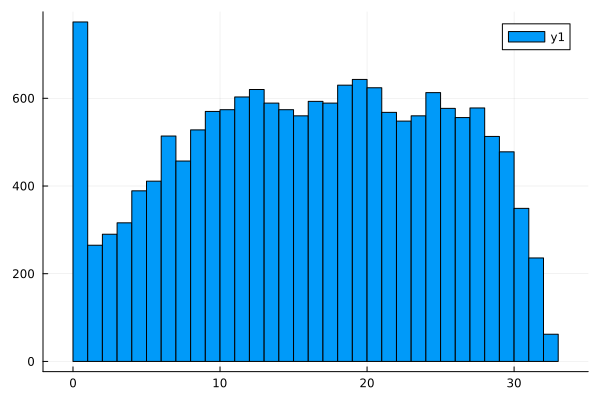

In [118]:
plot(histogram.(eachcol(select(df, r"freq_aNE")))...)